**This API call shows the flights in Italian airspace in real time ( to see them worldwide, run the cell without the Italian coordinates )**

In [1]:
import numpy as np
import pandas as pd
import requests

In [2]:
url = "https://opensky-network.org/api/states/all?lamin=35.0&lamax=47.5&lomin=6.5&lomax=19.0"   # only for Italy


In [3]:
# url = "https://opensky-network.org/api/states/all"   # for all the World

In [4]:
r = requests.get(url)

In [5]:
if r.status_code == 200:
    try:
        data = r.json()
    except json.JSONDecodeError:
        print("Error, invalid JSON response")
    else:
        print('Valid JSON response received')    
else:
    print("Error in request:", r.status_code)

Valid JSON response received


In [6]:
print(data)

{'time': 1761516168, 'states': [['471eff', 'WMT991  ', 'Hungary', 1761516168, 1761516168, 8.7289, 45.676, 1059.18, False, 79.19, 24.57, 9.75, None, 1059.18, '0415', False, 0], ['44023f', 'EJU93QT ', 'Austria', 1761516168, 1761516168, 10.6987, 46.8393, 11269.98, False, 226.86, 194.98, 0, None, 11231.88, '1121', False, 0], ['3c5ef6', 'EWG5202 ', 'Germany', 1761516168, 1761516168, 8.7747, 45.6903, 10568.94, False, 218.38, 21.85, -5.53, None, 10584.18, '0452', False, 0], ['471f87', 'WZZ4KP  ', 'Hungary', 1761516167, 1761516167, 11.6435, 41.7307, 10965.18, False, 274.34, 79.3, 0, None, 11125.2, '1444', False, 0], ['471f6b', 'WMT3AD  ', 'Hungary', 1761516168, 1761516168, 10.8858, 45.1238, 11277.6, False, 251.22, 94.23, 0, None, 11262.36, '0240', False, 0], ['471f6c', 'WMT8HS  ', 'Hungary', 1761516167, 1761516167, 11.953, 44.3397, 10507.98, False, 254.7, 124.3, 3.25, None, 10500.36, '0440', False, 0], ['471f69', 'WMT6CV  ', 'Hungary', 1761516168, 1761516168, 15.7942, 45.6443, 10668, False, 26

In [7]:
type(r.json())

dict

In [8]:
print(data.keys())

dict_keys(['time', 'states'])


In [9]:
from datetime import datetime
t = data['time']
print("Real time:", datetime.fromtimestamp(t))

Real time: 2025-10-26 23:02:48


In [10]:
airplane = data['states'][0]
print(airplane)

['471eff', 'WMT991  ', 'Hungary', 1761516168, 1761516168, 8.7289, 45.676, 1059.18, False, 79.19, 24.57, 9.75, None, 1059.18, '0415', False, 0]


In [11]:
df = pd.DataFrame(data['states'], columns= ("icao24", "callsign", "origin_country", "time_position", "last_contact", # queste colonne le ho trovate sul sito
    "longitude", "latitude", "baro_altitude", "on_ground", "velocity",
    "heading", "vertical_rate", "sensors", "geo_altitude",
    "squawk", "spi", "position_source"))
df.shape

(290, 17)

In [12]:
df['real_time'] = datetime.fromtimestamp(t)

In [13]:
t1 = pd.DataFrame([{"real_time": (t)}])

In [14]:
df = pd.concat([t1,df])
df.sample(10)

,real_time,icao24,callsign,origin_country,time_position,last_contact,longitude,latitude,baro_altitude,on_ground,velocity,heading,vertical_rate,sensors,geo_altitude,squawk,spi,position_source
79,2025-10-26 23:02:48,4ca56d,RYR50VC,Ireland,1.761516e+09,1.761516e+09,11.7813,43.2652,10668.00,False,241.12,141.93,-0.33,None,10713.72,1000,False,0.0
113,2025-10-26 23:02:48,48c224,RYR7FN,Poland,1.761516e+09,1.761516e+09,12.9068,43.7058,10972.80,False,253.74,47.22,0.00,None,11003.28,1000,False,0.0
92,2025-10-26 23:02:48,406cab,EXS513Z,United Kingdom,1.761516e+09,1.761516e+09,18.2069,44.8196,11590.02,False,203.14,312.74,0.00,None,11612.88,3240,False,0.0
44,2025-10-26 23:02:48,471daf,WZZ4PN,Hungary,1.761516e+09,1.761516e+09,9.4394,45.7251,5242.56,False,180.99,86.09,11.38,None,5242.56,1000,False,0.0
146,2025-10-26 23:02:48,495149,TAP2494,Portugal,1.761516e+09,1.761516e+09,9.6868,40.9586,9974.58,False,273.34,64.11,-5.20,None,10195.56,2260,False,0.0
73,2025-10-26 23:02:48,040198,ETH707,Ethiopia,1.761516e+09,1.761516e+09,16.6527,43.8103,11285.22,False,264.99,142.02,0.33,None,11330.94,2551,False,0.0
148,2025-10-26 23:02:48,4951d7,TAP934,Portugal,1.761516e+09,1.761516e+09,8.5594,47.4532,NaN,True,1.80,5.62,NaN,None,NaN,1000,False,0.0
118,2025-10-26 23:02:48,4b181b,SWR2120,Switzerland,1.761516e+09,1.761516e+09,7.0734,46.8344,10050.78,False,215.56,231.30,0.65,None,10058.40,3033,False,0.0
14,2025-10-26 23:02:48,471f54,WMT7RF,Hungary,1.761516e+09,1.761516e+09,13.1158,45.7460,10058.40,False,206.63,266.72,0.00,None,9997.44,7344,False,0.0
187,2025-10-26 23:02:48,501c08,ISR118,Croatia,1.761516e+09,1.761516e+09,16.1726,46.0139,10675.62,False,257.99,120.30,-0.33,None,10599.42,7502,False,0.0


In [15]:
df['time_position'].dtype

dtype('float64')

In [16]:
# conversion columns  in format datetime

df['time_position'] = pd.to_datetime(df['time_position'], unit='s')
df['last_contact'] = pd.to_datetime(df['last_contact'], unit='s')


In [17]:
df.sample(3)

,real_time,icao24,callsign,origin_country,time_position,last_contact,longitude,latitude,baro_altitude,on_ground,velocity,heading,vertical_rate,sensors,geo_altitude,squawk,spi,position_source
219,2025-10-26 23:02:48,4cadee,ITY1735,Ireland,2025-10-26 22:02:32,2025-10-26 22:02:32,15.5697,37.8273,2849.88,False,179.77,188.06,-19.51,None,3893.82,None,False,0.0
216,2025-10-26 23:02:48,4cadb7,RYR12JU,Ireland,2025-10-26 22:02:47,2025-10-26 22:02:47,12.0791,43.2616,11277.60,False,249.85,137.84,0.00,None,11346.18,1000,False,0.0
178,2025-10-26 23:02:48,4ca759,ITY722,Ireland,2025-10-26 22:02:48,2025-10-26 22:02:48,18.5695,38.8854,10675.62,False,252.89,115.42,0.00,None,11003.28,None,False,0.0


In [18]:
air_traffic = df.drop(columns=['sensors','squawk','spi','position_source'])
air_traffic.head()

,real_time,icao24,callsign,origin_country,time_position,last_contact,longitude,latitude,baro_altitude,on_ground,velocity,heading,vertical_rate,geo_altitude
0,1761516168,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2025-10-26 23:02:48,471eff,WMT991,Hungary,2025-10-26 22:02:48,2025-10-26 22:02:48,8.7289,45.6760,1059.18,False,79.19,24.57,9.75,1059.18
1,2025-10-26 23:02:48,44023f,EJU93QT,Austria,2025-10-26 22:02:48,2025-10-26 22:02:48,10.6987,46.8393,11269.98,False,226.86,194.98,0.00,11231.88
2,2025-10-26 23:02:48,3c5ef6,EWG5202,Germany,2025-10-26 22:02:48,2025-10-26 22:02:48,8.7747,45.6903,10568.94,False,218.38,21.85,-5.53,10584.18
3,2025-10-26 23:02:48,471f87,WZZ4KP,Hungary,2025-10-26 22:02:47,2025-10-26 22:02:47,11.6435,41.7307,10965.18,False,274.34,79.30,0.00,11125.20


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

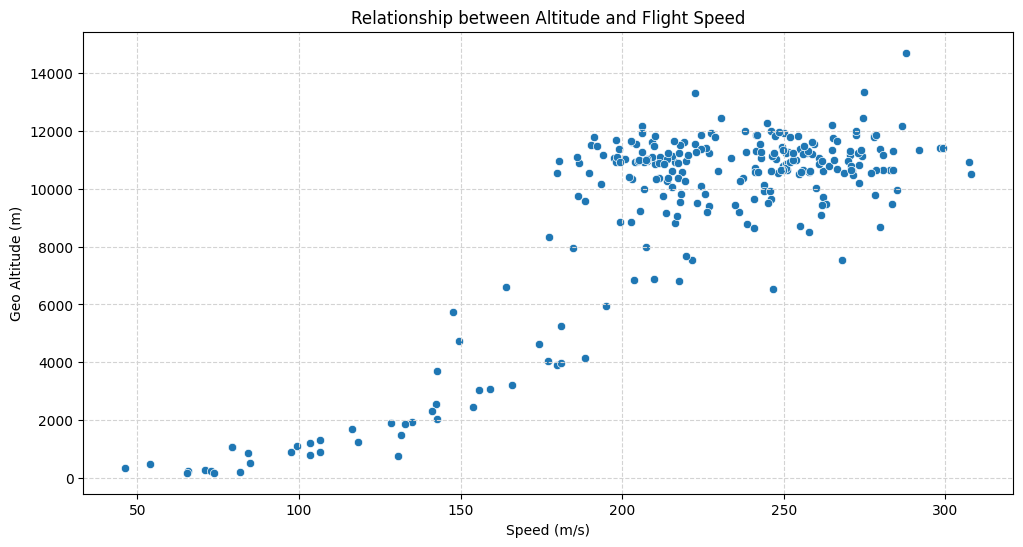

In [20]:
plt.figure(figsize=(12,6))
sns.scatterplot(air_traffic, x='velocity', y='geo_altitude') # hue='origin_country')
plt.xlabel('Speed (m/s)')
plt.ylabel('Geo Altitude (m)')
plt.grid(color='lightgrey', linestyle='--')
plt.title('Relationship between Altitude and Flight Speed');

In [21]:
print("Number of aircraft in flight:", len(data['states']))
print("First plane:", data['states'][0][1],"comes from:", data['states'][0][2])

Number of aircraft in flight: 290
First plane: WMT991   comes from: Hungary


In [22]:
import plotly.graph_objects as go

df_clean = df.dropna(subset=["latitude", "longitude", "heading"]).copy()

df_clean["text"] = (
    "✈️ <b>Callsign:</b> " + df_clean["callsign"].astype(str) + "<br>" +
    "<b>Origin:</b> " + df_clean["origin_country"].astype(str) + "<br>" +
    "<b>Velocity:</b> " + df_clean["velocity"].astype(str) + " m/s<br>" +
    "<b>Direction:</b> " + df_clean["heading"].astype(str) + "°"
)

map_center = {
    "lat": df_clean["latitude"].mean(),
    "lon": df_clean["longitude"].mean()
}

fig = go.Figure()

fig.add_trace(go.Scattermap(
    lat=df_clean["latitude"],
    lon=df_clean["longitude"],
    mode="markers",
    marker=go.scattermap.Marker(
        size=20,
        symbol="airport",  # Mapbox airplane icon
        angle=-df_clean["heading"],  # icon rotation
        color="dodgerblue"
    ),
    text=df_clean["text"],
    hoverinfo="text"
))

fig.update_layout(
    mapbox=dict(
        style="open-street-map",
        center=map_center,
        zoom=5
    ),
    margin={"r":0,"t":0,"l":0,"b":0},
    height=700,
    title="🛰️ Airplanes in flight (OpenSky API)"
)

fig.show()


**To be continue**